<a href="https://colab.research.google.com/github/ManaliMisra/mini/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import math
import datetime
import csv


In [4]:
def inside_circle(x, y):
    radii = np.sqrt(x**2 + y**2)
    return np.count_nonzero(radii <= 1), radii


In [12]:
import numpy as np
import math
import datetime
import csv

def inside_circle(x, y):
    return np.sum(x**2 + y**2 <= 1)

def estimate_pi_chunked(N, chunk_size=10**6):
    total_inside = 0
    total_points = 0

    num_full_chunks = N // chunk_size
    remainder = N % chunk_size

    for _ in range(num_full_chunks):
        x = np.random.rand(chunk_size)
        y = np.random.rand(chunk_size)
        total_inside += inside_circle(x, y)
        total_points += chunk_size

    if remainder > 0:
        x = np.random.rand(remainder)
        y = np.random.rand(remainder)
        total_inside += inside_circle(x, y)
        total_points += remainder

    return 4 * total_inside / total_points

# Loop through sample sizes and collect results
sample_sizes = [10**i for i in range(2, 10)]
results = []

for N in sample_sizes:
    start_time = datetime.datetime.now()
    est_pi = estimate_pi_chunked(N)
    end_time = datetime.datetime.now()

    # Estimate memory: x, y arrays + radii (3 total arrays)
    memory_used = 3 * min(N, 10**6) * 8 / (1024**3)  # in GiB
    time_taken = (end_time - start_time).total_seconds()
    rel_error = abs(est_pi - math.pi) / math.pi

    print(f"N={N}, π≈{est_pi:.6f}, Memory={memory_used:.6f} GiB, Time={time_taken:.4f} s, Rel. Error={rel_error:.6f}")
    results.append([N, est_pi, memory_used, time_taken, rel_error])

# Save to CSV
with open("pi_estimation_results.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["N", "Estimated Pi", "Memory (GiB)", "Time (s)", "Relative Error"])
    writer.writerows(results)


N=100, π≈3.160000, Memory=0.000002 GiB, Time=0.0005 s, Rel. Error=0.005859
N=1000, π≈3.112000, Memory=0.000022 GiB, Time=0.0008 s, Rel. Error=0.009420
N=10000, π≈3.141200, Memory=0.000224 GiB, Time=0.0008 s, Rel. Error=0.000125
N=100000, π≈3.147360, Memory=0.002235 GiB, Time=0.0053 s, Rel. Error=0.001836
N=1000000, π≈3.142148, Memory=0.022352 GiB, Time=0.0371 s, Rel. Error=0.000177
N=10000000, π≈3.141438, Memory=0.022352 GiB, Time=0.2673 s, Rel. Error=0.000049
N=100000000, π≈3.141370, Memory=0.022352 GiB, Time=2.6313 s, Rel. Error=0.000071
N=1000000000, π≈3.141569, Memory=0.022352 GiB, Time=29.0648 s, Rel. Error=0.000007


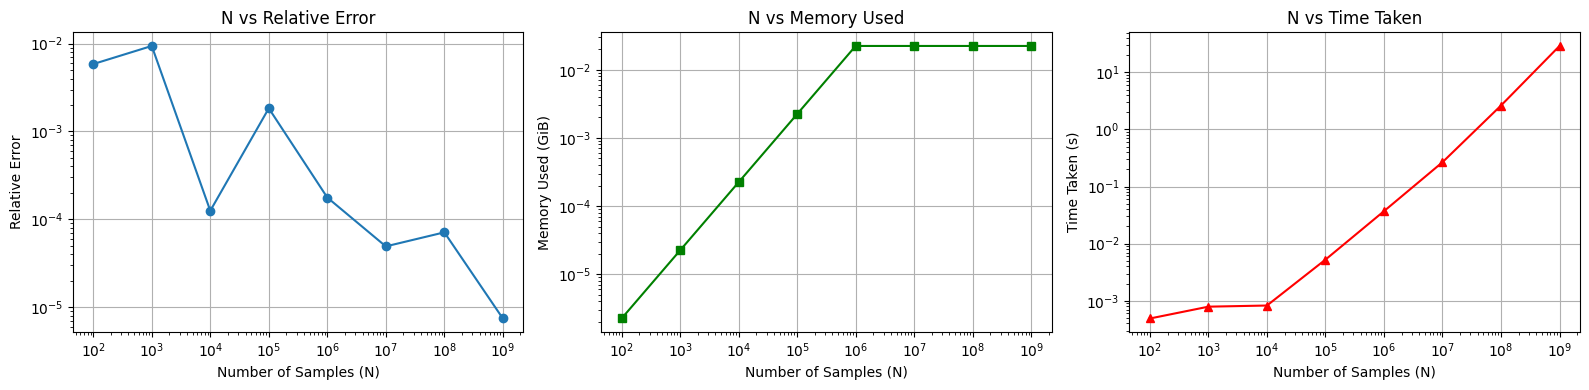

In [13]:
import matplotlib.pyplot as plt
import csv

# Read data
N_vals = []
pi_vals = []
memory_vals = []
time_vals = []
error_vals = []

with open("pi_estimation_results.csv", "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        N_vals.append(int(row["N"]))
        pi_vals.append(float(row["Estimated Pi"]))
        memory_vals.append(float(row["Memory (GiB)"]))
        time_vals.append(float(row["Time (s)"]))
        error_vals.append(float(row["Relative Error"]))

# Create log-log scatter plots
plt.figure(figsize=(16, 4))

# Plot 1: N vs Relative Error
plt.subplot(1, 3, 1)
plt.loglog(N_vals, error_vals, marker='o')
plt.xlabel("Number of Samples (N)")
plt.ylabel("Relative Error")
plt.title("N vs Relative Error")
plt.grid(True)

# Plot 2: N vs Memory Used
plt.subplot(1, 3, 2)
plt.loglog(N_vals, memory_vals, marker='s', color='green')
plt.xlabel("Number of Samples (N)")
plt.ylabel("Memory Used (GiB)")
plt.title("N vs Memory Used")
plt.grid(True)

# Plot 3: N vs Time Taken
plt.subplot(1, 3, 3)
plt.loglog(N_vals, time_vals, marker='^', color='red')
plt.xlabel("Number of Samples (N)")
plt.ylabel("Time Taken (s)")
plt.title("N vs Time Taken")
plt.grid(True)

plt.tight_layout()
plt.show()


Q1: How much more accurate does the estimate of π become as N is
increased? When N is increased by a factor of 10, does the error
decrease by a factor of 10?
Answer- There is no consistent change that is linear so when N is increased by a factor of 10, the error does not
decrease by a factor of 10 but there is gradual improvement in accuracy with increase in the N as the graph shows that the relative error is decreasing with the increase in N.

Q2: How does the amount of memory required scale as N is increased?
Do you expect that it would be linear? How would the slope of the
trendline in the log-log plot demonstrate that?
Answer - In the beginning, but not after a certain point. The memory usage is not linear with N as memory increases with N only up to a point, and then goes flat in the graph. This happens because no matter how large N is, the same amount of memory is getting reused.

Q3: How does the amount of time to calculate scale as N is increased?
Do you expect that it would be linear? How would the slope of the
trendline in the log-log plot demonstrate that?
Answer- The time required increase with the increase in N which is something I expected. we observe a straight-line trend which means the data has a linear relationship, although this after N crosses the 10 to the power of 4.